In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to calculate B-field on-axis for 1 current loop; L for x
def B_on_axis(L):

    increment = 0.01
    
    B_total_experimental = []
    B_total_theoretical = []
    difference = []
    x = np.arange(-L,L,increment)

    for m in x: # iterates over x
        resultant_B = 0
        for i in np.arange(0,2*np.pi,increment): # around loop
            dl = increment*np.asarray([0.0,-np.sin(i),np.cos(i)]) # loop element
            r=[-m,np.cos(i),np.sin(i)] # position of loop element
            r_amp = np.dot(r,r)**0.5  # amplitude of distance
            cross_product = np.cross(dl,r)
            dB = -(1/(4*np.pi*(r_amp**3)))*cross_product # dB
            resultant_B += dB
        B_total_experimental.append(resultant_B[0])
        
        B_theoretical = 0.5*(1/((1+m**2)**1.5))
        B_total_theoretical.append(B_theoretical)
        
        diff = resultant_B[0] - B_theoretical # difference
        diff_enlarged = diff*10**4
        difference.append(diff_enlarged)

    # plots B field along axis
    x_select = x[0::10]
    BC_select = B_total_experimental[0::10]
    plt.figure(1)
    plt.scatter(x_select, BC_select, marker='+',color='black'),
    plt.plot(x,B_total_theoretical)
    plt.xlabel('Length (m)')
    plt.ylabel('Magnetic field (T)')
    plt.legend(['Theoretical', 'Experimental'], loc='upper left'),
    plt.savefig('Theoretical_and_Experimental_On_Axis_B.pdf')

    # plots B field difference across axis
    plt.figure(2)
    plt.plot(x, difference)
    plt.xlabel('Length (m)')
    plt.ylabel('Difference ($10^{-4}$ T)')
    plt.savefig('Difference.pdf')

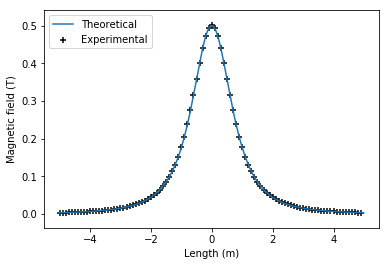

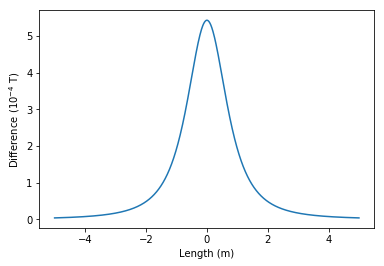

In [3]:
B_on_axis(5) 